<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>


Привет, меня зовут Головатский Николай, я буду проверять твой проект.

В Практикуме принято общаться на "ты", однако если это неудобно - дай знать, и можем перейти на более официальное общение.

Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их,** это может усложнить и затянуть повторную проверку. 

Я буду использовать цветовую разметку: 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Если все сделано хорошо.</div>

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Некритичное замечание, реккомендация на будущее. Для принятия проекта исправление не обязательно.</div>

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Критичная ошибка, необходимо исправить, иначе проект не будет принят.
</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
Например так:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
Hello World!
</div>

Если писать особо нечего, просто оставляй комментарий с галочкой 

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> 
☑️
</div>

<div class="alert alert-block alert-success">
<b>Общее впечатление:</b> 
    
- Спасибо за работу :)
- Определенно могу сказать, что проект очень сильный;
- Меня впечатлили твои навыки визуализации, продолжай в том же духе;
- Мне очень понравилось, как ты детально погружаешься в данные и не упускаешь никаких мелочей;
- В проекте осталось пара моментов, после правки которых, я смогу принять работу😉
    
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Хорошая практика начинать проект с контекста, описания задачи, возможного хода\плана исследования, а также описания имеющихся данных. Очень надеюсь, что ты будешь уделять этому внимание и в последующих проектах</div>





## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def percent_null(df): 
    name_column = []
    count_value = []
    percent = []
    for i in df.columns:
        name_column.append(i)
        count_value.append(df[i].isnull().sum())
        percent.append(int(df[i].isnull().sum() * 100 / len(df[i])))
    data = pd.DataFrame({'name' : np.array(name_column), 
                         'count': np.array(count_value), 
                         'percent' : np.array(percent)})
    print(data)

df = pd.read_csv("/datasets/real_estate_data.csv", sep='\t')
print(df.sample(5))
df.info()
print('Число дубликатов: ', df.duplicated().sum()) # поиск добликатов
percent_null(df) # подсчет количества пропусков и процентного соотношения к общему количеству значений
print(df['locality_name'].unique())



       total_images  last_price  total_area first_day_exposition  rooms  \
10309             2   3800000.0        49.7  2017-05-22T00:00:00      2   
22251             1   9800000.0        85.0  2017-04-14T00:00:00      3   
8467              0   3600000.0        44.0  2017-09-16T00:00:00      2   
8319             13   4200000.0        43.3  2018-10-01T00:00:00      1   
488               7   1800000.0        50.5  2017-10-26T00:00:00      2   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
10309             NaN          12.0         31.4     10          NaN  ...   
22251            2.77          25.0         48.0      9        False  ...   
8467              NaN           5.0         28.0      4          NaN  ...   
8319             2.70          10.0         18.7      3          NaN  ...   
488              2.52           5.0         28.1      4          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
10309           7.0

### Вывод

В датасете нет дубликатов.

Большинство населенных пунктов представленных в датасете являются сельскими. Имеется множество столбцов с пропущенными значениями, однако не все они учувствуют в предстоящем исследовании. Поэтому осуществить предъобработку необходимо следующих столбцов: ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name, cityCenters_nearest, days_exposition.

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> 
Я бы посоветовал не выводить dataframe функцией print(), так его сложно читать. Если ты хочешь вывести датафрейм последней строчкой кода в ячейке (или единственной), можешь просто обратиться к нему (df), или можно использовать метод display(df)</div>






<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Хорошее начало, информация о данных изучена👍</div>

## Предобработка данных

В силу малого числа пропуском в колонке locality_name, а также того, что дальнейшая обработка пропусков будет привязана к населенному пункту считаю допустимым удалить строки с пропусками в рассматриваемой колонке.

In [2]:
df = df.dropna(subset=['locality_name'])

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Согласен😉</div>

Осуществим замену floors_total на медианное значение, а пустующие значения в balcony заменим на 0.

In [3]:
med_floors = df['floors_total'].median()
df['floors_total'] = df['floors_total'].fillna(med_floors)
df = df.dropna(subset=['locality_name'])
df['balcony'] = df['balcony'].fillna(0)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Логично👍</div>

Далее осуществляется заполнение пробелов в cityCenters_nearest. Заполнение медианным значением не целесообразно, так как такая величина серьезно зависит от населенного пункта, а в сельских населенных пунктах и вовсе бессмыслена. Представляется заполнять пропуски в cityCenters_nearest медианным значением в зависимости от населенного пункта.

Создаем функцию (plenty_location), которая позволяет найти множество населенных пунктов, по которым есть не пустые значения в cityCenters_nearest, а также множество населенных пунктов с отсутствием такой информации. Например, передав функции "cityCenters_nearest" получаем множество населенных пунктов, в которых имеется информация о расстоянии до центра города и множество населенных пунктов без такой информации. Принимает один аргумент - имя столбца.

Кроме того, создадим функцию replace_median которая осуществляет замену на медианное значение в зависимости от населенного пункта. Принимает два аргумент - список с названиями населенных пунктов (по которым необходимо осуществить замену по медиане) и имя столбца.


In [4]:
def plenty_location(name): 
    df_not = df[df[name].isnull()]
    df_be = df[~(df[name].isnull())]
    set_not = set(df_not['locality_name'].unique())
    set_be = set(df_be["locality_name"].unique())
    return_data = []
    return_data.append(set_not - set_be)
    return_data.append((set_be & set_not))
    return return_data

def replace_median(list, name): 
    for i in list: 
        med = df.query('locality_name in @i')[name].median()
        bool_list = [df['locality_name'] == i]
        df.loc[bool_list[0], name] = df.loc[bool_list[0], name].fillna(med)

city_central = plenty_location('cityCenters_nearest')
print(city_central[0]) # покажет населенные пункты для которых ни разу не указывалось значение в колонке cityCenters_nearest
replace_median(city_central[1], 'cityCenters_nearest')

percent_null(df)
    

{'посёлок городского типа Лебяжье', 'посёлок городского типа Мга', 'поселок Пансионат Зелёный Бор', 'Луга', 'поселок Мичуринское', 'поселок Возрождение', 'поселок Калитино', 'поселок Новый Свет', 'Выборг', 'поселок Оредеж', 'Сертолово', 'Подпорожье', 'Новая Ладога', 'посёлок Кикерино', 'поселок городского типа Назия', 'посёлок Платформа 69-й километр', 'поселок Бугры', 'поселок Молодцово', 'посёлок при железнодорожной станции Вещево', 'посёлок Новогорелово', 'поселок Заводской', 'посёлок Дзержинского', 'Мурино', 'посёлок станции Свирь', 'посёлок Мичуринское', 'поселок Серебрянский', 'поселок городского типа Синявино', 'деревня Ям-Тесово', 'поселок городского типа Кузьмоловский', 'посёлок Перово', 'поселок Зимитицы', 'деревня Терпилицы', 'Волосово', 'посёлок Тельмана', 'посёлок городского типа Токсово', 'Сланцы', 'Бокситогорск', 'деревня Торошковичи', 'Пикалёво', 'посёлок городского типа Кузнечное', 'поселок Жилпосёлок', 'село Старая Ладога', 'деревня Лаголово', 'поселок Тельмана', 'пос

Значение в cityCenters_nearest отсутствуют в небольших населенных пунктах в которых значение центра города не имеет значения, а значит и расстояние до него смысла не имеет и не влияет на ценообразование, поэтому заполнять пропуски в указанном столбце дальше можно просто исказить данные.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> 👍</div>

Представляется, что аналогичным образом необходимо заполнить пропуски в days_exposition, так как особенности спроса и предложения недвижимости могут разлучатся от каждого населенного пункта.

In [5]:
dexpose_plenty = plenty_location('days_exposition')
replace_median(dexpose_plenty[1], 'days_exposition')

percent_null(df)

                    name  count  percent
0           total_images      0        0
1             last_price      0        0
2             total_area      0        0
3   first_day_exposition      0        0
4                  rooms      0        0
5         ceiling_height   9160       38
6           floors_total      0        0
7            living_area   1898        8
8                  floor      0        0
9           is_apartment  20890       88
10                studio      0        0
11             open_plan      0        0
12          kitchen_area   2269        9
13               balcony      0        0
14         locality_name      0        0
15      airports_nearest   5534       23
16   cityCenters_nearest   5386       22
17      parks_around3000   5510       23
18         parks_nearest  15586       65
19      ponds_around3000   5510       23
20         ponds_nearest  14565       61
21       days_exposition     80        0


Осталось 80 пропусков (менее 1%), которые можно заполнить медианой, не боясь исказить данные.

In [6]:
median_dexposition = df['days_exposition'].median()
df['days_exposition'] = df['days_exposition'].fillna(median_dexposition)

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Согласен😉</div>

Далее необходимо обработать floors_total, living_area. Так как жилая площадь и площадь кухни как правило зависят от общей площади, то наиболее адекватным способом заменить пропуски будет использование общего коэффициента.

In [7]:
percent_living_area = round(df['living_area'].sum() / df['total_area'].sum(), 2)
percent_kitchen_area = round(df['kitchen_area'].sum() / df['total_area'].sum(), 2)
df.loc[df['living_area'].isnull(), 'living_area'] = \
df.loc[df['living_area'].isnull(), 'total_area' ] * percent_living_area
df.loc[df['kitchen_area'].isnull(), 'kitchen_area'] = \
df.loc[df['kitchen_area'].isnull(), 'total_area' ] * percent_kitchen_area

percent_null(df)

                    name  count  percent
0           total_images      0        0
1             last_price      0        0
2             total_area      0        0
3   first_day_exposition      0        0
4                  rooms      0        0
5         ceiling_height   9160       38
6           floors_total      0        0
7            living_area      0        0
8                  floor      0        0
9           is_apartment  20890       88
10                studio      0        0
11             open_plan      0        0
12          kitchen_area      0        0
13               balcony      0        0
14         locality_name      0        0
15      airports_nearest   5534       23
16   cityCenters_nearest   5386       22
17      parks_around3000   5510       23
18         parks_nearest  15586       65
19      ponds_around3000   5510       23
20         ponds_nearest  14565       61
21       days_exposition      0        0


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Молодец🔥</div> 

Так как ceiling_height пропущено 38 процентов значений, то заполнение медианной или же средним может сильно исказить выборку и так как осталось более 10 тыс. заполненных значений (числено серьезный материал для исследования) я не буду заполнять пропуски.

Значения в остальных колонках не исследуются. 

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> Далее мы будем фильтровать выбросы по ceiling_height, вместе с выбивающимися значениями мы так жк удалим и пропуски, потеряв при этом много ценных данных. Распределение этого параметра не должно иметь большое стандартное отклонение. Мы можем заполнить пропуски стандартной высотой потолков. Например 2.7 метра, или что то в этом роде

Мы можем заполнить пропуски в is_apartment, логично предположить, что люди просто не указали этот параметр, так что пропуски можно заменить на False</div>

<div class="alert alert-block alert-info">
Проверяем какое медианное значение у ceiling_height

In [8]:
df['ceiling_height'].median()

2.65

<div class="alert alert-block alert-info">
2.65 значние адекватное на него и осуществим замену пропусков

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> Теперь согласен👍 </div>

Необходимо осуществить сменить тип данных в 'last_price', 'floors_total','floor', 'balcony', 'days_exposition' на int, 
так как знаки после запятой в данных колонках значения не имеют. 


In [10]:
col = ['last_price', 'floors_total','floor', 'balcony',
       'days_exposition']
for i in col: 
    df[i] = df[i].astype('int')

Также необходимо обработать данные в столбце first_day_exposition

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],
                                            format='%Y-%m-%d')

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Типы данных исправлены верно👍</div>

После обработки датасет имеет следующий вид: 

In [12]:
df.info()
percent_null(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  int64         
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

Добавление цены квадратного метра, деня, недели, месяц и года публикации объявления.

In [13]:
df['cost_meter'] = df['last_price'] / df['total_area']
df['day_expose'] = df['first_day_exposition'].dt.weekday
df['month_expose'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_expose'] = pd.DatetimeIndex(df['first_day_exposition']).year

Добавление этажи квартиры с приминением метода apply и функции.
Функция возращает значения, где 0 - первый этаж
                                2 - другое 
                                3 - последний 

In [14]:
def floor_procesing(floors_total, floor):
    if floor == 1: 
        return 0
    elif floors_total == floor: 
        return  3
    else: 
        return 2

df['floor_id'] = df.apply(lambda x: floor_procesing(x['floors_total'], x['floor']),
                                                    axis=1
                         )

Добавляем соотношение жилой и общей площади, а также отношение площади кухни к общей

In [15]:
df['living/total_area'] = df['living_area'] / df['total_area']
df['kitchen/total_area'] = df['kitchen_area'] / df['total_area']

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅</b> Все рассчеты проведены верно, молодец🔥
</div>

## Исследовательский анализ данных

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


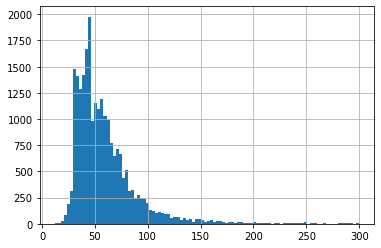

In [16]:
print(df['total_area'].describe())
df['total_area'].hist(bins=100, range=(12, 300))
plt.show()

Из представленного графика видно, что наибольшее число квартир площадью до 50 м. 

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


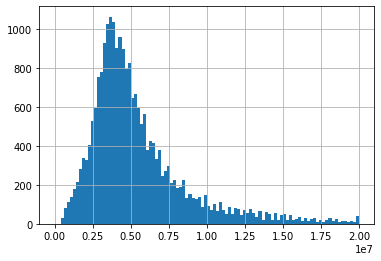

In [17]:
print(df['last_price'].describe())
df['last_price'].hist(bins=100, range=(0, 20000000))
plt.show()

Цена большинства квартир расположена в коридоре между 2.5 и 5 млн. рублей.

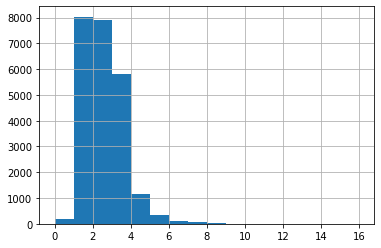

In [18]:
df['rooms'].hist(bins=16, range=(0, 16))
plt.show()

Большинство квартир однокомнатные/двухкомнатные по 8 тыс. каждого вида, трёхкомнатные также значительно представлены на рынке  6 тыс.
По графику видно, что есть квартиры с числом комнат 0, что очевидно ошибка, которую необходимо обработать.

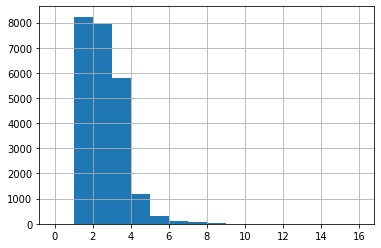

In [19]:
room_zero = [df['rooms'] == 0]
df.loc[room_zero[0], 'rooms'] = 1
df['rooms'].hist(bins=16, range=(0, 16))
plt.show()

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> В данном случае, заполнять медианой не лучшее решение - так мы сделаем эти квартиры двухкомнатными. Я бы предположил, что это студии и заполнил бы значения единицами</div>

<div class="alert alert-block alert-info">
Исправил на заполнение единицами

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> 👍 </div>

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


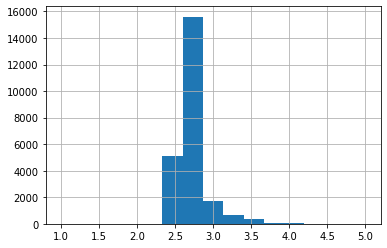

In [20]:
print(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=15, range=(1, 5))
plt.show()

Имеются квартиры с высотой потолка менее 2,3 метров и более 5, что скорее всего не соответствует действительности, поэтому эти значения необходимо заменить.

count    23650.000000
mean         2.696277
std          0.214851
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64


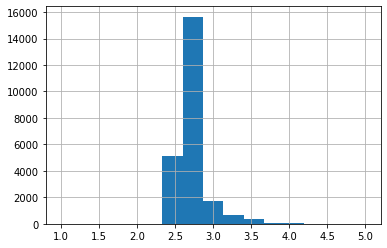

In [21]:
bool_list = (df['ceiling_height'] < 2.3) | (df['ceiling_height'] > 5)
df.loc[bool_list, 'ceiling_height'] = df['ceiling_height'].median()

print(df['ceiling_height'].describe())
df['ceiling_height'].hist(bins=15, range=(1, 5))
plt.show()

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅</b> Тут согласен

Большинство квартир имеют высоту потолка от 2.5 до 2.7 м.

count    23650.000000
mean       169.935180
std        206.930599
min          1.000000
25%         45.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64
медиана 95.0


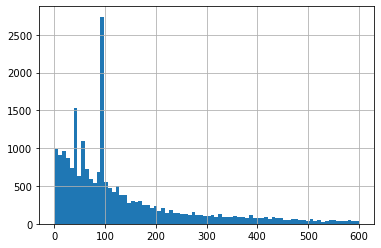

In [22]:
print(df['days_exposition'].describe())
print('медиана', df['days_exposition'].median())
df['days_exposition'].hist(bins=80, range=(1, 600))
plt.show()

Показатели время продажи квартиры:
среднее число дней до продажи  - 169, медиана - 95. 
Можно считать, что продажа совершена быстро если завершена до 45 дней, если более 425 дней необычно долго, то необычно долго.

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера❌:</b> По шагам проекта, тут должен быть блок очистки выбросов. Если мы приняли решение их не очищать, нужно как то это прокомментировать</div>

<div class="alert alert-block alert-info">
Используем ящик с усами, чтобы найти выбросы 

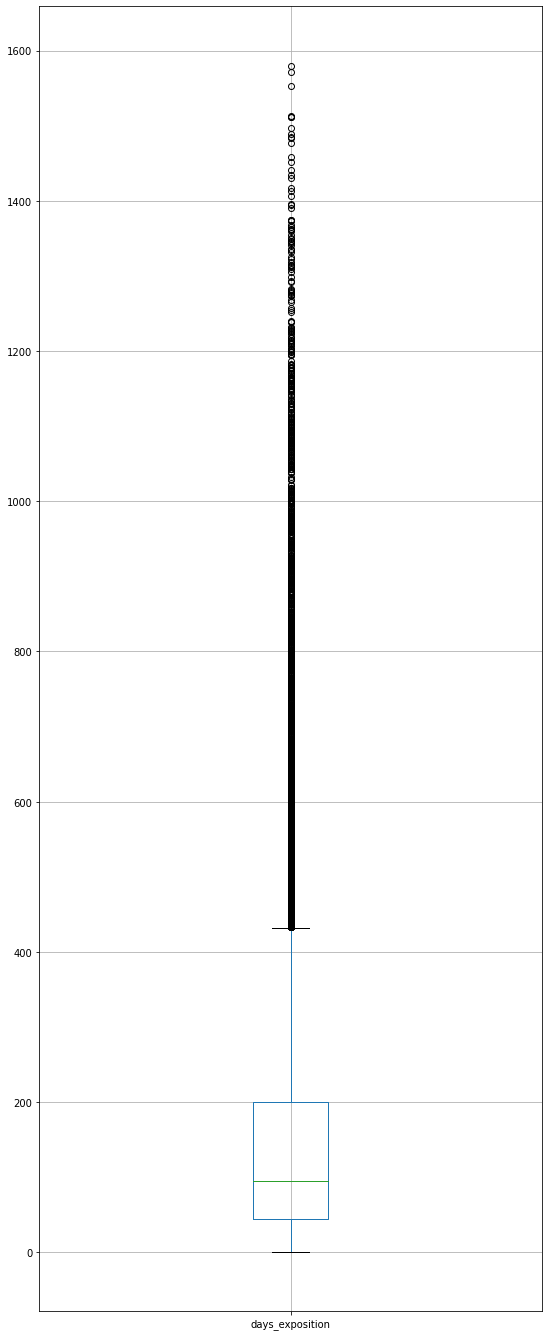

In [23]:
df.boxplot('days_exposition', figsize=(9, 24))
plt.show()

<div class="alert alert-block alert-info">
Из шрафика в

<div class="alert alert-block alert-danger">
<b>Комментарий ревьюера_v2❌:</b> Не очень понял, что мы в итоге делаем с выбросами

Сразу подскажу, определять выбросы на глаз - не лучшая идея. Предлагаю воспользоваться правилом 1.5IQR, так мы сможем математически обосновать границы выбросов и отфильтровать их</div>

<div class="alert alert-block alert-info">
Странно, я подсчитывал количество выбросов и писал обоснование, почему их не стоит удалять, но почему-то эта часть работы не сохранилась...
    
Подсчитываем количество выбросов.


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v3✅:</b> Бывает)

In [24]:
print(df['days_exposition'].describe())
desc = df['days_exposition'].describe().reset_index()
iqr = (desc['days_exposition'].loc[6] - desc['days_exposition'].loc[4]) * 1.5
print('выбросы с',iqr + desc['days_exposition'].loc[6])
df[df['days_exposition'] > iqr + desc['days_exposition'].loc[6]].shape

count    23650.000000
mean       169.935180
std        206.930599
min          1.000000
25%         45.000000
50%         95.000000
75%        200.000000
max       1580.000000
Name: days_exposition, dtype: float64
выбросы с 432.5


(2295, 29)

<div class="alert alert-block alert-info">
Выбросами является 2295 значений (более 10% выборки), что составляет значительную часть датафрейма и характеризует рынок недвижимости как таковой, кроме того, продажа квартиры за период более 432 дня не является физически невозможной величиной, такие случаи реальны, поэтому считаю, что удаление таких выбросов может исказить данные.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v3✅:</b> Отлично😉 </div>

total_area 0.6537428966335395


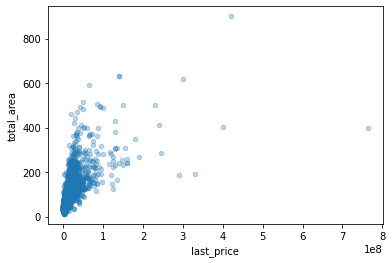

rooms 0.36529114679905983


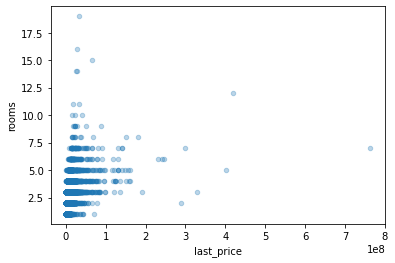

cityCenters_nearest -0.20714024892945485


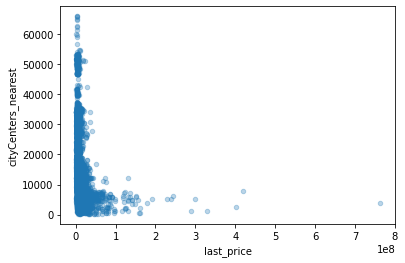

floor_id 0.06321134784579008


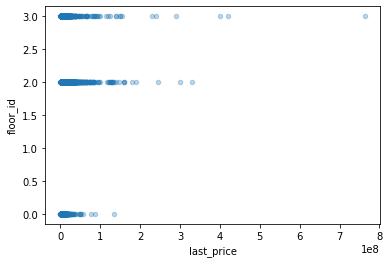

day_expose 0.0016068614793023964


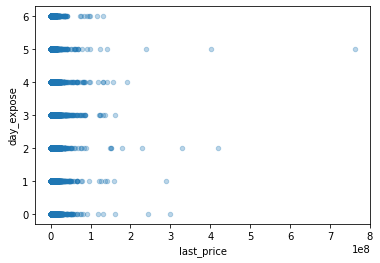

month_expose 0.0027410294199242224


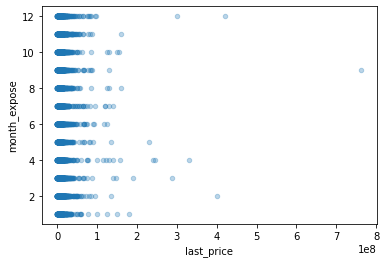

year_expose -0.04292705107683142


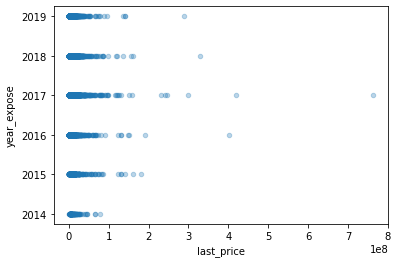

In [25]:
for i in ['total_area', 'rooms', 'cityCenters_nearest', 'floor_id', 
          'day_expose', 'month_expose', 'year_expose']: 
    print(i, df['last_price'].corr(df[i]))
    df.plot(x='last_price', y=i, kind='scatter', alpha=0.3)
    plt.show()

По площади имеется значительная корреляция 0.65, однако не абсолютная - очевидно влияют и другие факторы.
По числу комнат имеется корреляция 0.36. 
Чем ближе к центру города тем квартиры больше стоят корреляция -0.2.
По этажам корреляция несущественная, однако по гистограмме видно, что случаев дорогостоящего жилья на последнем этаже продается 
больше.
День, месяц никак не влияют.

По годам корреляция отсутствует, однако по графику, что с 2014 года на рынке стало появляется больше дорогостоящего жилья. Так, в 2014 году жилья по цене более 100 млн. рублей не продавалось, однако с 2015 года такие предложения на рынке появились.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Отличный анализ, все графики на месте, советую попробовать в использовании параметр figsize (например figsize=(16, 6)), так будет удобнее изучать графики)
</div>




Выборка из 10 насел. пунктов. 

In [26]:
list_10_city = (df['locality_name'].value_counts().
                sort_values(ascending=False)[:10].index)
data_10_city = df.query('locality_name in @list_10_city')
data_10_city_cost = data_10_city.pivot_table(index='locality_name', 
                                             values=['last_price', 'total_area'],
                                             aggfunc='sum')
data_10_city_cost['cost_for_metr'] = (data_10_city_cost['last_price'] /
                                      data_10_city_cost['total_area'])
print(data_10_city_cost.sort_values(by='cost_for_metr', ascending=False))

                     last_price  total_area  cost_for_metr
locality_name                                             
Санкт-Петербург    126750673626  1017958.15  124514.621378
Пушкин               2387074264    22712.98  105097.361245
деревня Кудрово      1266013220    13924.95   90916.895213
посёлок Парголово    1467600459    16847.50   87110.874551
посёлок Мурино       1916809680    23037.66   83203.314920
посёлок Шушары       1807555999    23681.36   76328.217594
Колпино              1339839246    17992.24   74467.617484
Гатчина              1070919360    15639.48   68475.381534
Всеволожск           1508048965    22296.83   67635.128626
Выборг                770483000    13307.56   57898.142109


Самым дорогим является Санкт-Петербург с ценой 124 514 руб. за кв. м., а самым дешевым Выборг с ценой 57 898 за кв. м. 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Тут все верно👍 Я бы предложил визуализировать нашу сводную таблицу в bar_plot, это было бы супер наглядно)</div>




Поиск центра Санкт-Петербурга

/tmp/ipykernel_647/2508170225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['cityCenters_nearest_km'] = round(spb_data['cityCenters_nearest'] / 1000) # вычисляем киломметры и округляем
/tmp/ipykernel_647/2508170225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest_km'].astype('int')


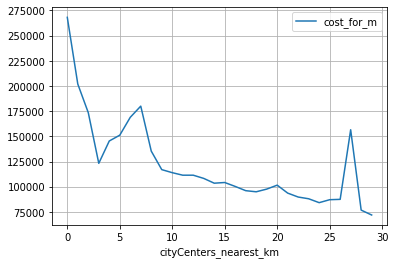

In [27]:
spb_data = df.query('locality_name in "Санкт-Петербург"')
spb_data['cityCenters_nearest_km'] = round(spb_data['cityCenters_nearest'] / 1000) # вычисляем киломметры и округляем 
spb_data['cityCenters_nearest_km'] = spb_data['cityCenters_nearest_km'].astype('int')

cost_sbp = spb_data.pivot_table(index='cityCenters_nearest_km', 
                     values=['last_price', 'total_area'],
                     aggfunc='sum')

cost_sbp['cost_for_m'] = cost_sbp['last_price'] / cost_sbp['total_area']
cost_sbp = cost_sbp.reset_index() # преобразовываем сводную таблицу
cost_sbp.plot(y='cost_for_m', x='cityCenters_nearest_km', grid=True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Комментарий ревьюера⚠️:</b> Чтобы избавиться от предупреждений, можно использовать команду
    
import warnings
    
   
warnings.filterwarnings('ignore')</div>





<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b> 👍 </div>

Имеется устойчивый быстрый рост с 3 км. до центра - этот радиус и можно включить в центр города.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Границу центра выделена правильно, график наглядный. Молодец👍👍👍
</div>

In [28]:
spb_cent_data = spb_data.query('cityCenters_nearest_km <= 3')

print(spb_cent_data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()) 
print(df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe())


       total_area    last_price       rooms  ceiling_height
count  879.000000  8.790000e+02  879.000000      879.000000
mean    98.632446  1.630205e+07    3.114903        3.037952
std     56.543138  2.645654e+07    1.478546        0.399454
min     12.000000  2.100000e+06    1.000000        2.500000
25%     63.300000  7.300000e+06    2.000000        2.650000
50%     85.000000  9.800000e+06    3.000000        3.000000
75%    116.500000  1.499500e+07    4.000000        3.300000
max    517.000000  4.013000e+08   14.000000        4.900000
         total_area    last_price         rooms  ceiling_height
count  23650.000000  2.365000e+04  23650.000000    23650.000000
mean      60.329069  6.541127e+06      2.078436        2.696277
std       35.661808  1.089640e+07      1.066393        0.214851
min       12.000000  1.219000e+04      1.000000        2.300000
25%       40.000000  3.400000e+06      1.000000        2.600000
50%       52.000000  4.650000e+06      2.000000        2.650000
75%       69

По основным стат. данным видно, что жилье в центре Санкт-Петербурга больше по площади, имеет больше комнат, более высокие потолки и дороже (в среднем на 40%). 
Теперь стоит сравнить распределение указанных показателей на графиках.

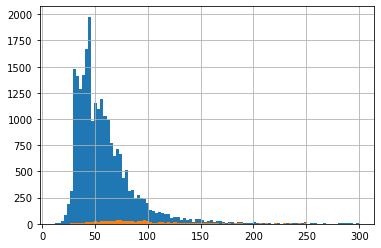

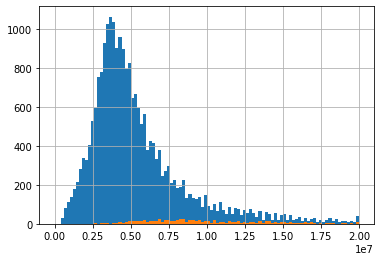

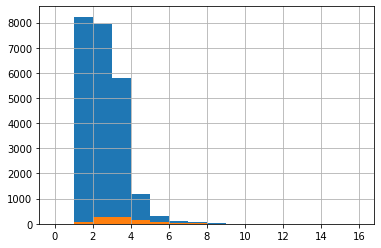

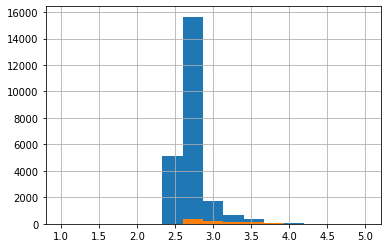

In [29]:
df['total_area'].hist(bins=100, range=(12, 300))
spb_cent_data['total_area'].hist(bins=100, range=(12, 300))
plt.show()

df['last_price'].hist(bins=100, range=(0, 20000000))
spb_cent_data['last_price'].hist(bins=100, range=(0, 20000000))
plt.show()

df['rooms'].hist(bins=16, range=(0, 16))
spb_cent_data['rooms'].hist(bins=16, range=(0, 16))
plt.show()

df['ceiling_height'].hist(bins=15, range=(1, 5))
spb_cent_data['ceiling_height'].hist(bins=15, range=(1, 5))
plt.show()

По гистограммам так же видно, что имеется смещение графиков, отображающих показатели для квартир в центре Санкт-Петербурга 
вправо, что подтверждает ранее сделанные выводы. 

In [30]:
analis_colum_corr = ['total_area', 'rooms', 'cityCenters_nearest', 'floor_id',  
                      'day_expose', 'month_expose', 'year_expose', 'last_price'] 

spb_cor = spb_cent_data[analis_colum_corr].corr().iloc[-1].reset_index()
df_cor = df[analis_colum_corr].corr().iloc[-1].reset_index()
print(spb_cor.merge(df_cor, on='index', suffixes=('_spb', '_df')))

                 index  last_price_spb  last_price_df
0           total_area        0.565577       0.653743
1                rooms        0.240239       0.365291
2  cityCenters_nearest       -0.164656      -0.207140
3             floor_id        0.087370       0.063211
4           day_expose       -0.005725       0.001607
5         month_expose       -0.020950       0.002741
6          year_expose       -0.024959      -0.042927
7           last_price        1.000000       1.000000


Наблюдается небольшое снижение корреляции, сильнее всего снижется корреляция в столбцах total_area, rooms.
Возможно это связано с тем, что площади квартир и количество комнат в среднем больше, чем в общем по региону. 

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Все параметры изучены, графики построены, выводы написаны, молодец🔥🔥🔥

## Общий вывод

Наибольшее число квартир до 50 м., большинство квартир однокомнатные/двухкомнатные по 8 тыс. каждого вида, трёхкомнатные также значительно представлены на рынке 6 тыс. Большинство квартир имеют высоту потолка от 2.5 до 2.7 м. Цена большинства квартир расположена в коридоре между 2.5 и 5 млн. рублей. Среднее число дней до продажи - 169, медианное значение - 95. Можно считать, что продажа совершена быстро если завершена до 45 дней, если более 425 дней необычно долго, то необычно долго.

Из 10 населенных пунктов с наибольшим предложением самым дорогим является Санкт-Петербург с ценой 124 514 руб. за кв. м., а самым дешевым Выборг с ценой 57 898 за кв. м. 

Цена больше всего зависит от площади жилья (0.65), числа комнат (0.36), расстояния до центра (-0.2). По этажам корреляция несущественная, однако по гистограмме видно, что случаев дорогостоящего жилья на последнем этаже продается больше. По годам корреляция отсутствует, однако с 2014 года на рынке стало появляется больше дорогостоящего жилья. Так, в 2014 году жилья по цене более 100 млн. рублей не продавалось, однако с 2015 года такие предложения на рынке появились.


Жилье в центре Санкт-Петербурга больше по площади, имеет больше комнат, более высокие потолки и дороже (в среднем на 40%), вместе с тем, влияние площади и количества комнат в центре ниже чем по региону и составляет 0.56 и 0.23 соответственно.


<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b> Отличный вывод, теперь работа логчески завершена и мы можем понять суть исследования🔥</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера✅:</b>Мне очень понравилась твоя работа. Все рассуждения верные, очень логичные и осмысленные. Ничего лишнего, всё по полкам. Ты подробно разбираешься в деталях, для будущего аналитика это очень важная черта😊

Проект еще нужно немного доработать, а именно:

- исправить блок предобработки
    
- исправить блок анализа данных
    
- исправить блок очистки выбросов
    
Остальные замечания оставляю на твое усмотрение😉

Жду твою работу на повторное ревью.
    
[Интересная статья про визуализацию](https://habr.com/ru/company/netologyru/blog/341364/)
    
[Тут есть полезные приемы Markdown](https://paulradzkov.com/2014/markdown_cheatsheet/)

</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v2✅:</b>
Ты отлично справился с доработками, но все еще нужно доделать блок обработки выбросов
    
С остальным все хорошо🔥
    
Жду твою работу на повторное ревью.
</div>

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера_v3✅:</b> Отличная работа, проект принимаю. Могу с уверенностью сказать - ты хорошо владеешь пройденным материалом. Желаю удачи в дальнейшей учебе🔥 </div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  посчитано и добавлено в таблицу: цена квадратного метра
- [ ]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [ ]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [ ]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [ ]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [ ]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [ ]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [ ]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [ ]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [ ]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод